In [40]:
import numpy as np
import matplotlib.pyplot as pt
import scipy.linalg as la
%matplotlib inline

We'll solve

$-\large \frac{d^2u}{dx^2}$$ = f(x)$, $\space$ for $0 < x < 1$

$u(0) = \alpha$,$\space$  $u(1) = \beta$

In [41]:
def grid_2norm(xvec, h):
    s = 0
    for x in xvec:
        s += abs(x)**2
    return np.sqrt(h*s)

In [42]:
def f(xvec): 
    return (np.pi**2)*np.sin(np.pi*xvec)

def true_sol(x):
    return x - np.sin(np.pi*x)

In [43]:
n = 9
#n = 32

alpha = 0
beta = 1

mesh = np.linspace(0, 1, n+1)
h = mesh[1] - mesh[0]

In [44]:
print(h)
print(mesh)

0.111111111111
[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]


In [45]:
# Inner Second Order Difference Matrix
first_row = np.zeros(n-1)
first_row[0] = -2; 
first_row[1] = 1;
A = (1/h**2)*la.toeplitz(first_row)
print(A)

[[-162.   81.    0.    0.    0.    0.    0.    0.]
 [  81. -162.   81.    0.    0.    0.    0.    0.]
 [   0.   81. -162.   81.    0.    0.    0.    0.]
 [   0.    0.   81. -162.   81.    0.    0.    0.]
 [   0.    0.    0.   81. -162.   81.    0.    0.]
 [   0.    0.    0.    0.   81. -162.   81.    0.]
 [   0.    0.    0.    0.    0.   81. -162.   81.]
 [   0.    0.    0.    0.    0.    0.   81. -162.]]


In [46]:
rhs = f(mesh[1:-1])
print(rhs)

[ 3.37560351  6.34405942  8.54732814  9.71966293  9.71966293  8.54732814
  6.34405942  3.37560351]


In [47]:
# Apply Boundary Conditions to rhs
rhs[0] = rhs[0] - (alpha/(h**2))
rhs[-1] = rhs[-1] - (beta/(h**2))

In [48]:
print(rhs)

[  3.37560351   6.34405942   8.54732814   9.71966293   9.71966293
   8.54732814   6.34405942 -77.62439649]


In [49]:
# Solve inner system
us = la.solve(A, rhs)

In [50]:
# Assemble complete solution
sol = np.zeros(n+1)
sol[0] = alpha # Left Boundary condition
sol[1:-1] = us # Computed result
sol[-1] = beta # Right Boundary condition

In [53]:
print(sol)

[ 0.         -0.23440314 -0.42713215 -0.54153945 -0.55042418 -0.43931307
 -0.20820612  0.1284234   0.54337464  1.        ]


In [51]:
# Error
tr_sol = true_sol(mesh)
#error = la.norm(sol - tr_sol, np.inf)
diff = sol - tr_sol
error = grid_2norm(diff, h)
print("For h: "+str(h)+",\t\t error="+str(error))

For h: 0.111111111111,		 error=0.00722385630997


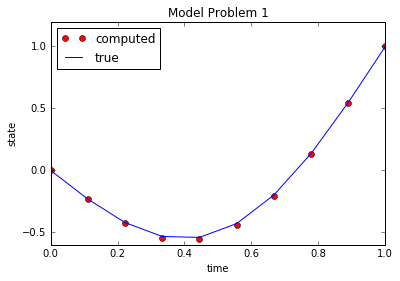

In [52]:
fig = pt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(mesh, sol, 'ro', label='computed')
ax1.plot(mesh, tr_sol, label='true')
ax1.set_title(r"Model Problem 1")
ax1.legend(loc='upper left')
ax1.set_xlabel('time')
ax1.set_ylabel('state')

In [16]:
h = .03125
n = (1/h)+1
grid = np.linspace(0,1,n)
print(grid)
h1 = grid[1]- grid[0]
print("h1: "+str(h1))
h2 = h
print("h1: "+str(h2))

[ 0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875
  0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875
  1.     ]
h1: 0.03125
h1: 0.03125


In [17]:
grid.size

33

In [16]:
np.arange(0,1+h,h).size

33

In [13]:
n = 32

In [14]:
h=1/32
h

0.03125